# Plot/map IOP2 WG data for a given time period, make KML

Started 2023/04/23

Basic idea is to load data from all vehicles, then:
1. Plot and save on fixed axes with tight margin and transparent background (for KML file)
2. later add ability to map data


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime
import requests
import cartopy.crs as ccrs                   # import projections
import cartopy
import gsw
import functions  # requires functions.py from this directory

import sys
sys.path.insert(0,'../../Tom_tools/')
import Tom_tools_v1 as tt


In [2]:
plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 600
#plt.close('all')

%matplotlib inline
%matplotlib widget
# %matplotlib qt5

__figdir__ = '../plots/' 
savefig_args = {'bbox_inches':'tight', 'pad_inches':0}
plotfiletype='png'

In [3]:
savefig = True
plt.close('all')

In [4]:
# List of WGs
WG_list = ['WHOI22','WHOI32','WHOI43','STOKES', 'PLANCK', 'KELVIN', 'CARSON','WHOI1102','PASCAL']
path='../data/raw/WG_NRT_IOP2/'

In [5]:
# Make a list of the files:
n=0
file_list = []
for WG in WG_list:
    file = path+'met_'+WG+'.nc'
    file_list.append(file)

In [6]:
file_list

['../data/raw/WG_NRT_IOP2/met_WHOI22.nc',
 '../data/raw/WG_NRT_IOP2/met_WHOI32.nc',
 '../data/raw/WG_NRT_IOP2/met_WHOI43.nc',
 '../data/raw/WG_NRT_IOP2/met_STOKES.nc',
 '../data/raw/WG_NRT_IOP2/met_PLANCK.nc',
 '../data/raw/WG_NRT_IOP2/met_KELVIN.nc',
 '../data/raw/WG_NRT_IOP2/met_CARSON.nc',
 '../data/raw/WG_NRT_IOP2/met_WHOI1102.nc',
 '../data/raw/WG_NRT_IOP2/met_PASCAL.nc']

In [7]:
# Read in cleaned met files from all WG
n=0
for WG in WG_list:
    file = file_list[n]
    varstr = 'met_'+WG
    locals()[varstr]=xr.open_dataset(file,decode_times=True) #Time and z already fixed in WG_realtime_cleanup.ipynb
    n=n+1
    print(file)

../data/raw/WG_NRT_IOP2/met_WHOI22.nc
../data/raw/WG_NRT_IOP2/met_WHOI32.nc
../data/raw/WG_NRT_IOP2/met_WHOI43.nc
../data/raw/WG_NRT_IOP2/met_STOKES.nc
../data/raw/WG_NRT_IOP2/met_PLANCK.nc
../data/raw/WG_NRT_IOP2/met_KELVIN.nc
../data/raw/WG_NRT_IOP2/met_CARSON.nc
../data/raw/WG_NRT_IOP2/met_WHOI1102.nc
../data/raw/WG_NRT_IOP2/met_PASCAL.nc


In [8]:
%whos

Variable       Type       Data/Info
-----------------------------------
WG             str        PASCAL
WG_list        list       n=9
cartopy        module     <module 'cartopy' from '/<...>ges/cartopy/__init__.py'>
ccrs           module     <module 'cartopy.crs' fro<...>packages/cartopy/crs.py'>
cftime         module     <module 'cftime' from '/h<...>ages/cftime/__init__.py'>
file           str        ../data/raw/WG_NRT_IOP2/met_PASCAL.nc
file_list      list       n=9
functions      module     <module 'functions' from <...>/code_IOP2/functions.py'>
gsw            module     <module 'gsw' from '/home<...>ackages/gsw/__init__.py'>
matplotlib     module     <module 'matplotlib' from<...>/matplotlib/__init__.py'>
met_CARSON     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
met_KELVIN     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
met_PASCAL     Dataset    <xarray.Dataset>\nDimensi<...>3 during S-MODE IOP2 c...
met_PLANCK     Dataset    <xarray

In [9]:
met_WHOI43

<xarray.Dataset>
Dimensions:                      (time: 2783)
Coordinates:
  * time                         (time) datetime64[ns] 2023-03-23T00:01:00 .....
Data variables: (12/46)
    cr6_card_status              (time) object ...
    batt_volt_Min                (time) float64 ...
    panel_temp_Avg               (time) float64 ...
    proc_time_Max                (time) float64 ...
    proc_time_Avg                (time) float64 ...
    slow_proc_time_1_Max         (time) float64 ...
    ...                           ...
    SGR4_flux_Wm2_Avg            (time) float64 ...
    index_1hz_file               (time) float64 ...
    index_10hz_file              (time) float64 ...
    index_ADCP_file              (time) float64 ...
    uctd_psu_Avg                 (time) float64 ...
    uctd_sigma0_Avg              (time) float64 ...
Attributes:
    title:    S-MODE IOP2 2023 wave glider
    summary:  real-time wave glider data recorded by SV3 during S-MODE IOP2 c...

WHOI22<xarray.DataArray 'time' ()>
array('2023-04-24T13:16:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-24T13:16:00
WHOI32<xarray.DataArray 'time' ()>
array('2023-04-24T13:16:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-24T13:16:00
WHOI43<xarray.DataArray 'time' ()>
array('2023-04-24T13:16:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-24T13:16:00
STOKES<xarray.DataArray 'time' ()>
array('2023-04-24T13:16:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-24T13:16:00
PLANCK<xarray.DataArray 'time' ()>
array('2023-04-24T13:16:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-24T13:16:00
KELVIN<xarray.DataArray 'time' ()>
array('2023-04-24T13:16:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-24T13:16:00
CARSON<xarray.DataArray 'time' ()>
array('2023

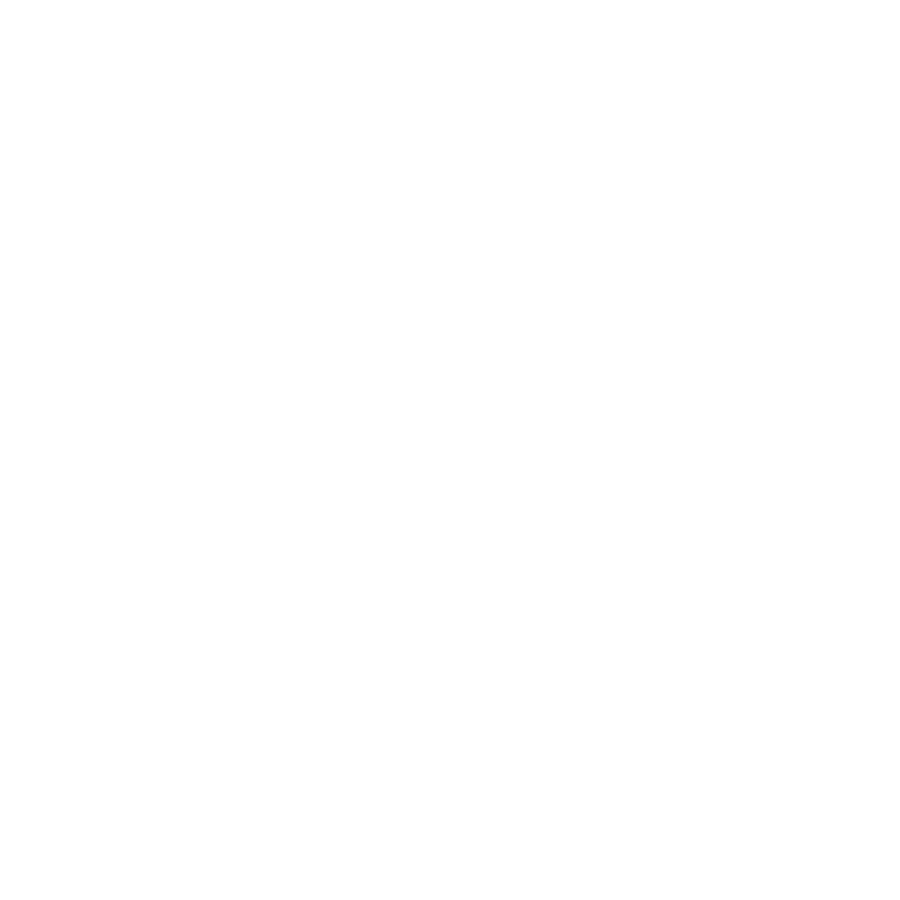

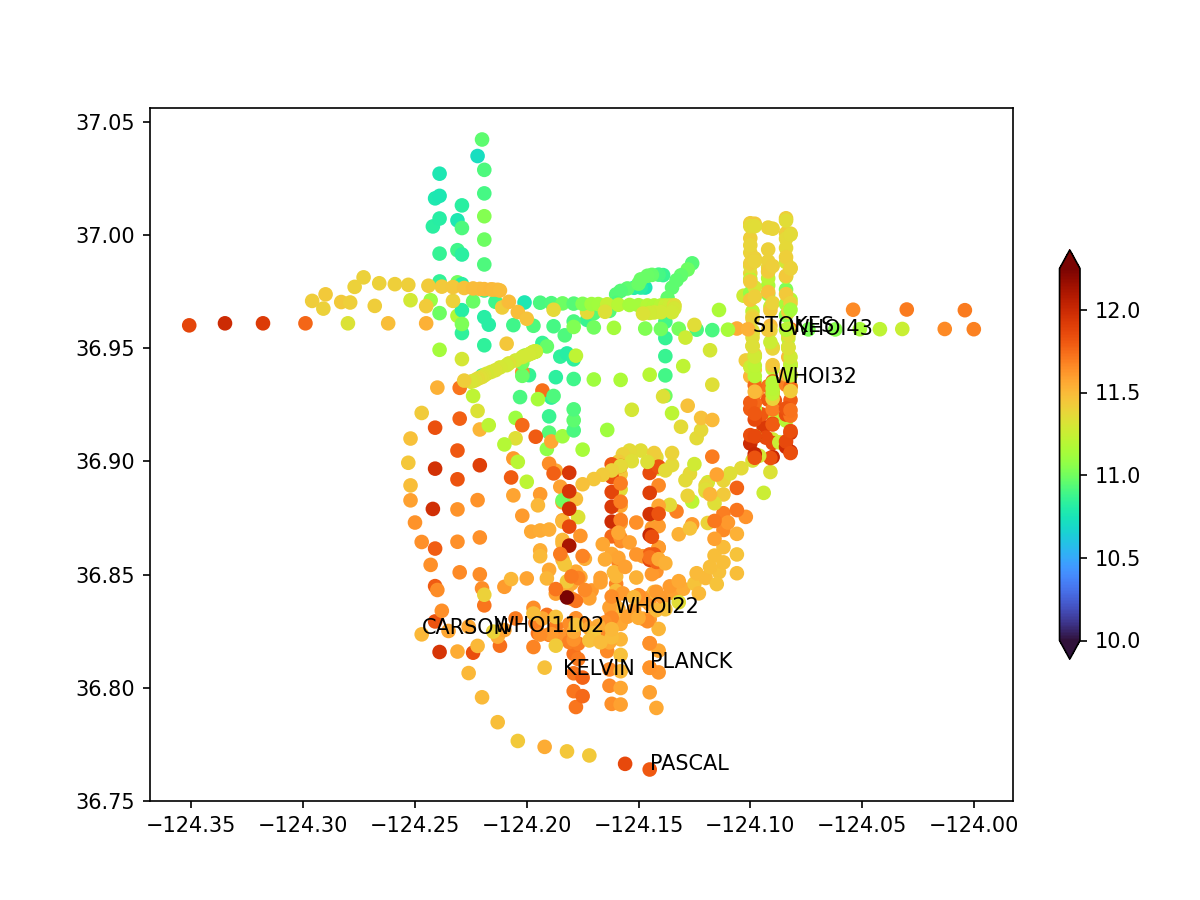

In [10]:
tmin = np.datetime64('2023-04-22T19:00:00')
tmax = np.datetime64('now')+np.timedelta64(72,'h') #doing this to make sure all data up to now are included despite time zone differences
skip=2
plotvar = 'uctd_sigma0_Avg'; vmin=24; vmax=25.5
plotvar = 'uctd_temp_Avg'; vmin=10; vmax=12.25
# plotvar = 'uctd_cond_Avg'; vmin=None; vmax=None
x = []
y = []
z = []
plt.set_cmap(cmap=plt.get_cmap('turbo'))#viridis
fig, ax = plt.subplots(1,1,figsize=(8, 6))
for WG in WG_list:
    ds = eval('met_'+WG)
    print(WG+str(ds.time[-1]))
    tind = np.flatnonzero(np.logical_and(ds.time>tmin,ds.time<tmax))
    tind=tind[0:-1:skip]

    cs = ax.scatter(ds.longitude_1hz_Avg[tind].values,ds.latitude_1hz_Avg[tind].values,s=None,c=np.squeeze(eval('ds.'+plotvar+'[tind].values')),vmin=vmin,vmax=vmax)
    ax.text(ds.longitude_1hz_Avg[tind[-1]].values,ds.latitude_1hz_Avg[tind[-1]].values,WG)
    # ax.set(ylabel='wind speed [m/s]')
    for i in ds.longitude_1hz_Avg[tind].values.tolist(): x.append(i)
    for i in ds.latitude_1hz_Avg[tind].values.tolist(): y.append(i)
    for i in np.squeeze(eval('ds.'+plotvar+'[tind].values').tolist()): z.append(i)

cb = plt.colorbar(cs,fraction = 0.022,extend='both')

In [11]:
# 

In [12]:
ds.time[-1]

<xarray.DataArray 'time' ()>
array('2023-04-24T13:16:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2023-04-24T13:16:00

In [13]:
xg = np.arange(-124.35,-124,.03)
yg = np.arange(36.8,37.05,.03)

In [14]:
zg, eg = tt.objmap(x, y, z, xg, yg, lcorr=0.1, tcorr=.1, err = 0.05, orientation=0)

/home/jtomf/mambaforge/envs/try_again/lib/python3.11/site-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jtomf/mambaforge/envs/try_again/lib/python3.11/site-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


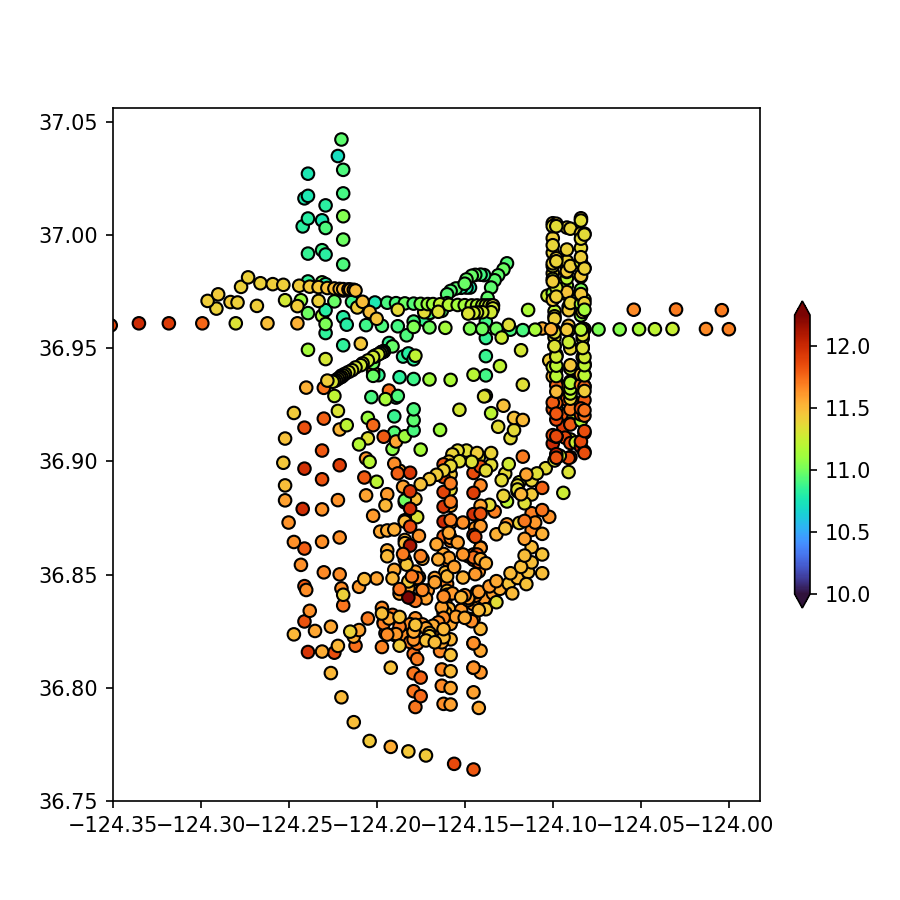

In [15]:
plt.figure()
plt.contourf(xg,yg,zg,vmin=vmin,vmax=vmax)
cs = plt.scatter(x,y,s=None,c=z,vmin=vmin,vmax=vmax,edgecolor='k')
cb = plt.colorbar(cs,fraction = 0.022,extend='both')

In [16]:
np.shape(zg)

(9, 12)

In [17]:
ds.longitude_1hz_Avg[tind].values.tolist()

[-124.252,
 -124.243,
 -124.233,
 -124.224,
 -124.214,
 -124.201,
 -124.194,
 -124.189,
 -124.184,
 -124.179,
 -124.175,
 -124.171,
 -124.168,
 -124.164,
 -124.159,
 -124.154,
 -124.15,
 -124.146,
 -124.143,
 -124.14,
 -124.138,
 -124.136,
 -124.134,
 -124.134,
 -124.134,
 -124.135,
 -124.14,
 -124.143,
 -124.145,
 -124.148,
 -124.165,
 -124.188,
 -124.211,
 -124.245,
 -124.268,
 -124.291,
 -124.296,
 -124.29,
 -124.283,
 -124.279,
 -124.277,
 -124.273,
 -124.266,
 -124.259,
 -124.253,
 -124.244,
 -124.238,
 -124.233,
 -124.228,
 -124.224,
 -124.221,
 -124.219,
 -124.216,
 -124.215,
 -124.213,
 -124.212,
 -124.208,
 -124.204,
 -124.2,
 -124.209,
 -124.228,
 -124.247,
 -124.252,
 -124.253,
 -124.252,
 -124.252,
 -124.25,
 -124.247,
 -124.243,
 -124.24,
 -124.238,
 -124.235,
 -124.231,
 -124.226,
 -124.22,
 -124.213,
 -124.204,
 -124.192,
 -124.182,
 -124.172,
 -124.156,
 -124.145]